### Student Performance Indicator

#### Life cycle of ML Project
- Understanding the problem statement.
- Data Collection
- Data Checks to perform
- EDA
- Data Pre-processing
- Model Training
- Choose best model

### 1. Problem Statement
- This project understands how the student's performance(test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test Preparation course.

### 2. Data Collection
- Data consists of 8 columns and 1000 rows

In [33]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv("data\\stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [35]:
# Shape of the Dataset
df.shape

(1000, 8)

In [36]:
# Check Missing Values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### Observation 1: No missing values

#### Check Duplicates

In [37]:
df.duplicated().sum()

0

#### There are no duplicate values in this dataset

### Check Data Types

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [39]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Observation 2:
- All means are very close, around 66 and 69.
- All standard deviations are very similar as well.
- The minimum score for math is 0 whereas, the minimum scores for reading and writing are much higher.

### Exploring Data

In [40]:
cardinal_dict = {col: list(df[col].unique()) for col in df.columns if df[col].dtype == 'object'}
for i, j in cardinal_dict.items():
    print(f"Categories in {i} variable: {j}")

Categories in gender variable: ['female', 'male']
Categories in race_ethnicity variable: ['group B', 'group C', 'group A', 'group D', 'group E']
Categories in parental_level_of_education variable: ["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school']
Categories in lunch variable: ['standard', 'free/reduced']
Categories in test_preparation_course variable: ['none', 'completed']


In [41]:
numerical_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
categorical_features = [col for col in df.columns if df[col].dtype == "O"]

print(f"We have {len(numerical_features)} Numerical Features named: {numerical_features}")
print(f"\nWe have {len(categorical_features)} Categorical Features named: {categorical_features}")

We have 3 Numerical Features named: ['math_score', 'reading_score', 'writing_score']

We have 5 Categorical Features named: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for "Total Score" and "Average Score" 

In [42]:
df['total_score'] = df[numerical_features].sum(axis=1) 
df['average'] = df['total_score'] / 3

In [43]:
math_full = df[df['math_score']==100]['math_score'].count()
writing_full = df[df['writing_score']==100]['writing_score'].count()
reading_full = df[df['reading_score']==100]['reading_score'].count()

print(f"Number of students with full marks in Math: {math_full}")
print(f"Number of students with full marks in Writing: {writing_full}")
print(f"Number of students with full marks in Reading: {reading_full}")

Number of students with full marks in Math: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [44]:
math_less_20 = df[df['math_score']<=20]['math_score'].count()
writing_less_20 = df[df['writing_score']<=20]['writing_score'].count()
reading_less_20 = df[df['reading_score']<=20]['reading_score'].count()

print(f"Number of students with less than 20 marks in Math: {math_less_20}")
print(f"Number of students with less than 20 marks in Writing: {writing_less_20}")
print(f"Number of students with less than 20 marks in Reading: {reading_less_20}")

Number of students with less than 20 marks in Math: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### Insights
- From above values we understand that students have performed worst in Mathematics
- Best performance is in Reading Section

### Exploring Data Viz

#### Visualize Average scores distribution to make some conclusion

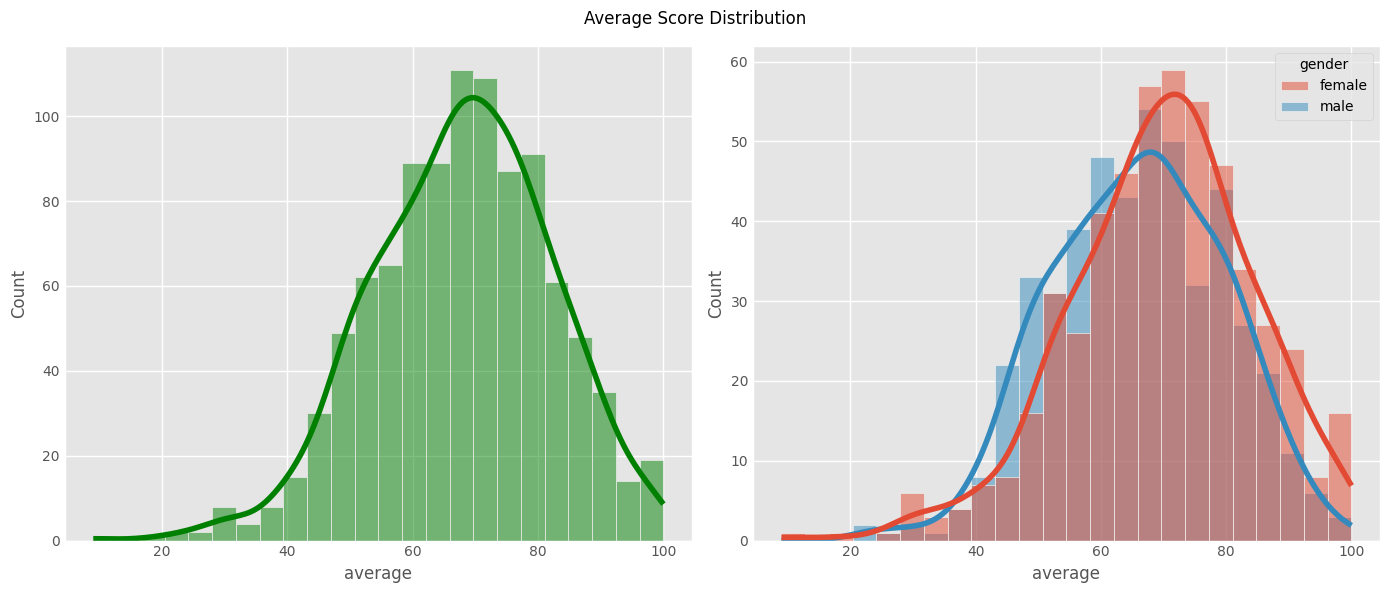

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
plt.subplot(121)
sns.histplot(x=df['average'], color='g', kde=True) 
plt.subplot(122)
sns.histplot(x=df['average'], hue=df['gender'], kde=True)
plt.suptitle("Average Score Distribution")
plt.tight_layout()
plt.show()

#### Insights: 
- Female students tend to perform better

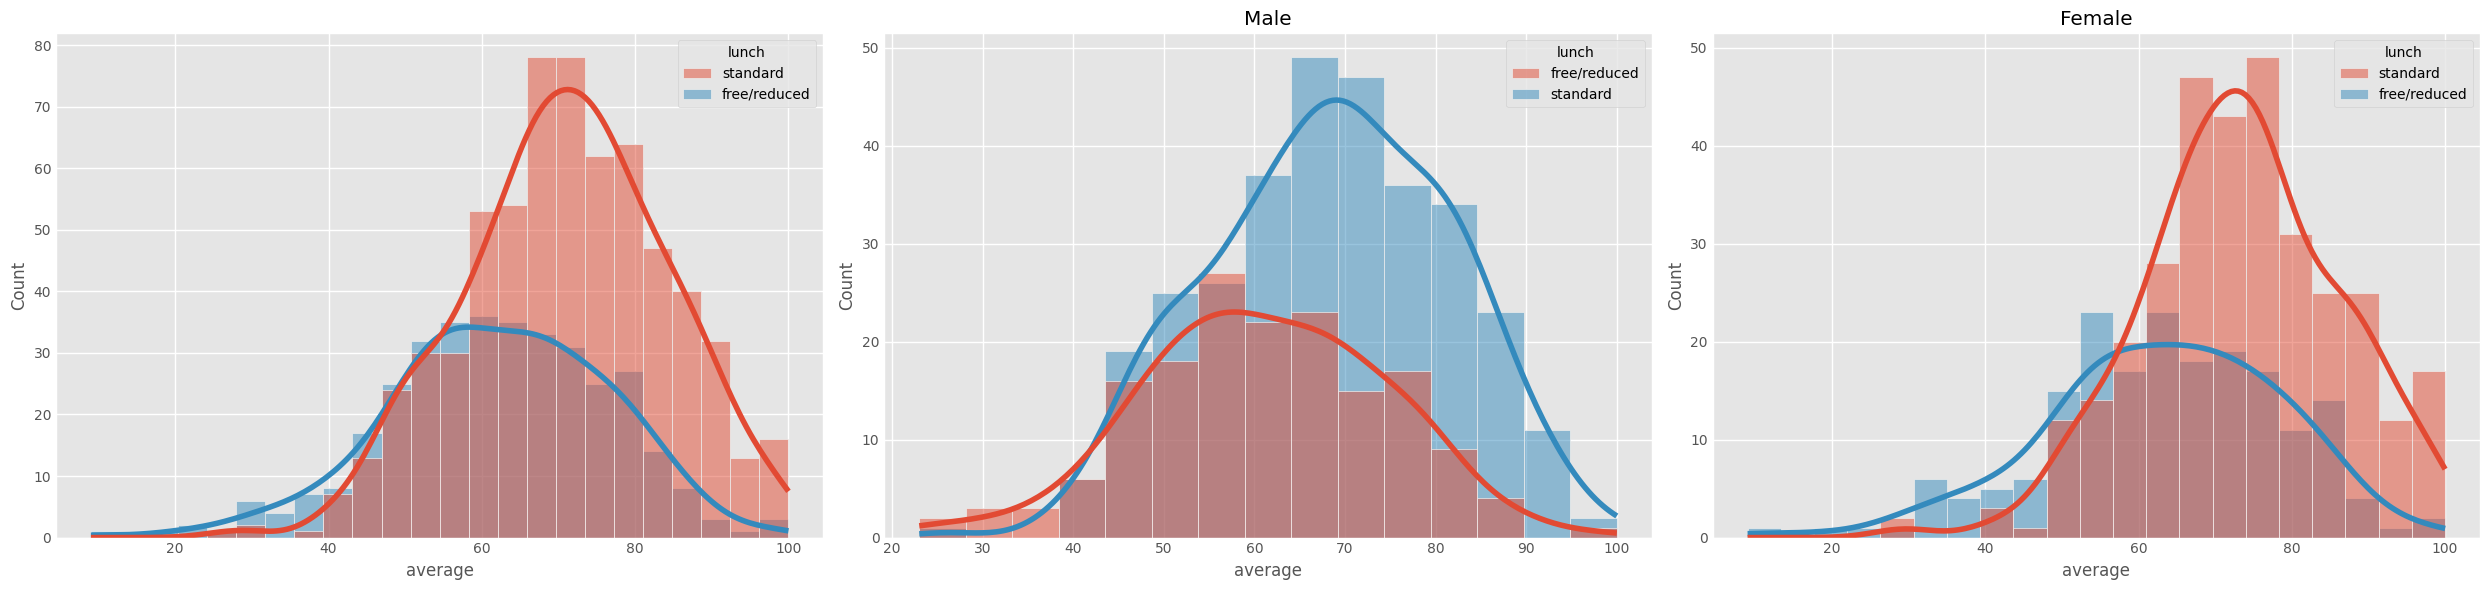

In [46]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.title("Male")
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.title("Female")
plt.tight_layout()
plt.show()

### Insights:
- Standard Lunch helps perform well in exams
- Standard Lunch helps perform well in exams be it a male or a female

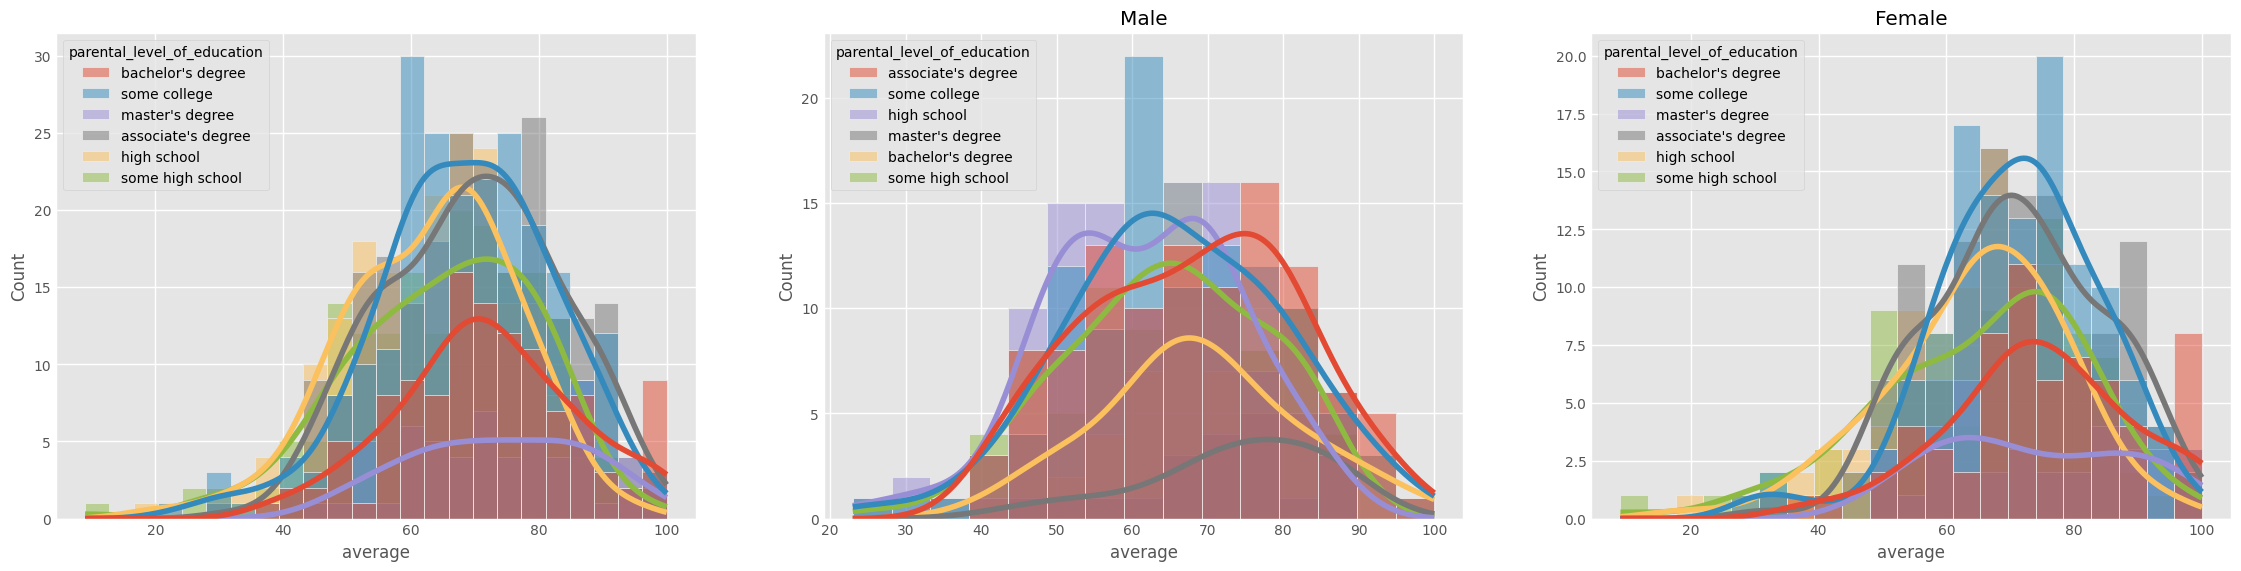

In [47]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.title("Male")
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.title("Female")
plt.show()

### Insights:
- In general, parents education don't help students perform well in exam
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

In [48]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

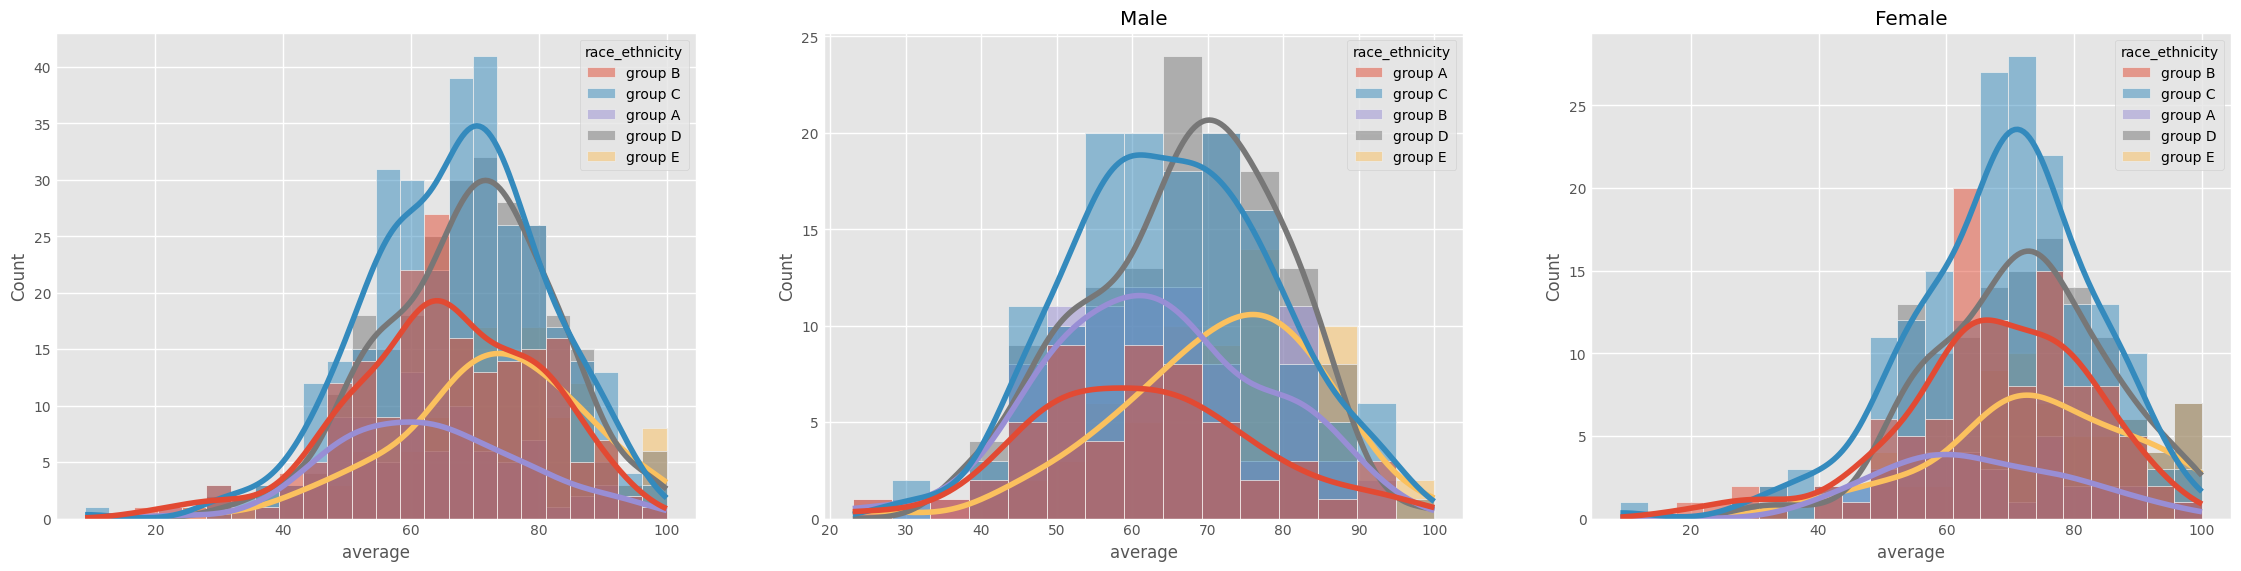

In [49]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.title("Male")
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.title("Female")
plt.show()

##### Insights:
- Students of group A and group B tends to perform poorly in exam
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

In [50]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

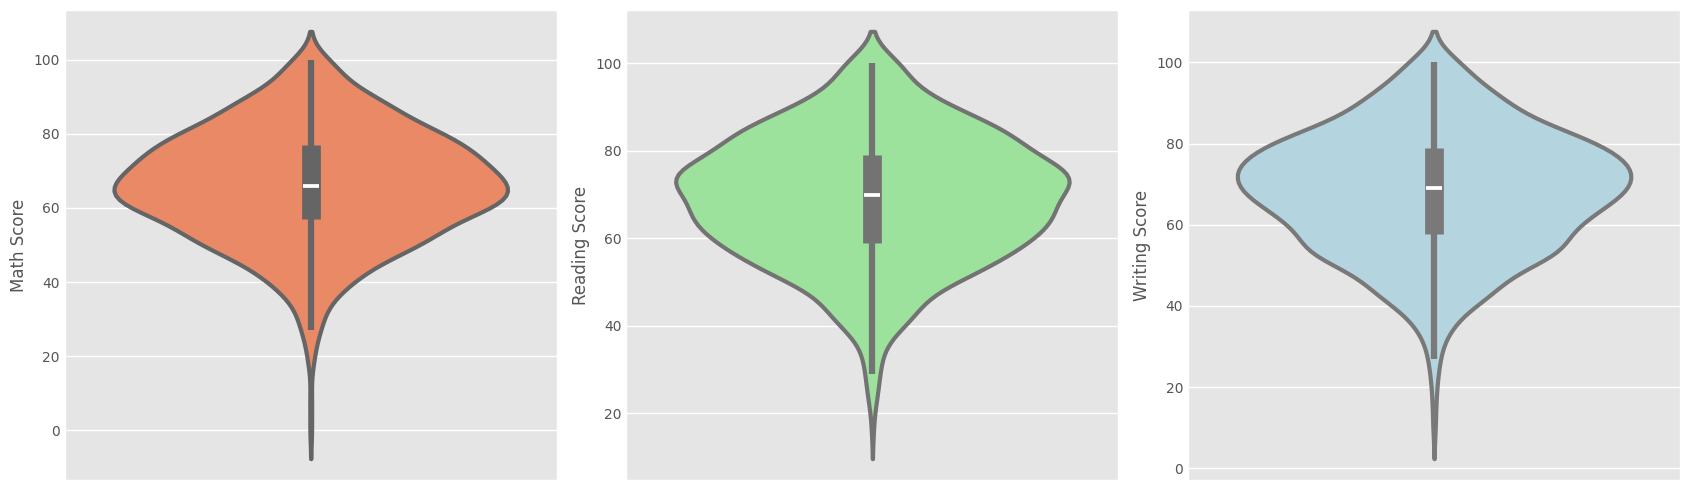

In [51]:
# Maximum score of students in all three subjects
plt.subplots(1, 3, figsize=(17, 5))
plt.subplot(131)
plt.ylabel("Math Score")
sns.violinplot(data=df, y='math_score', color='coral', linewidth=3)
plt.subplot(132)
plt.ylabel('Reading Score')
sns.violinplot(data=df, y='reading_score', color='lightgreen', linewidth=3)
plt.subplot(133)
plt.ylabel('Writing Score')
sns.violinplot(data=df, y='writing_score', color='lightblue', linewidth=3)
plt.tight_layout()
plt.show()

#### Insights:
- From the above graphs it is clear that most students scored between 60 and 80 in Math where as, they scored between 50 and 80 for both Reading and Writing.  

#### Multivariate analysis using pieplot

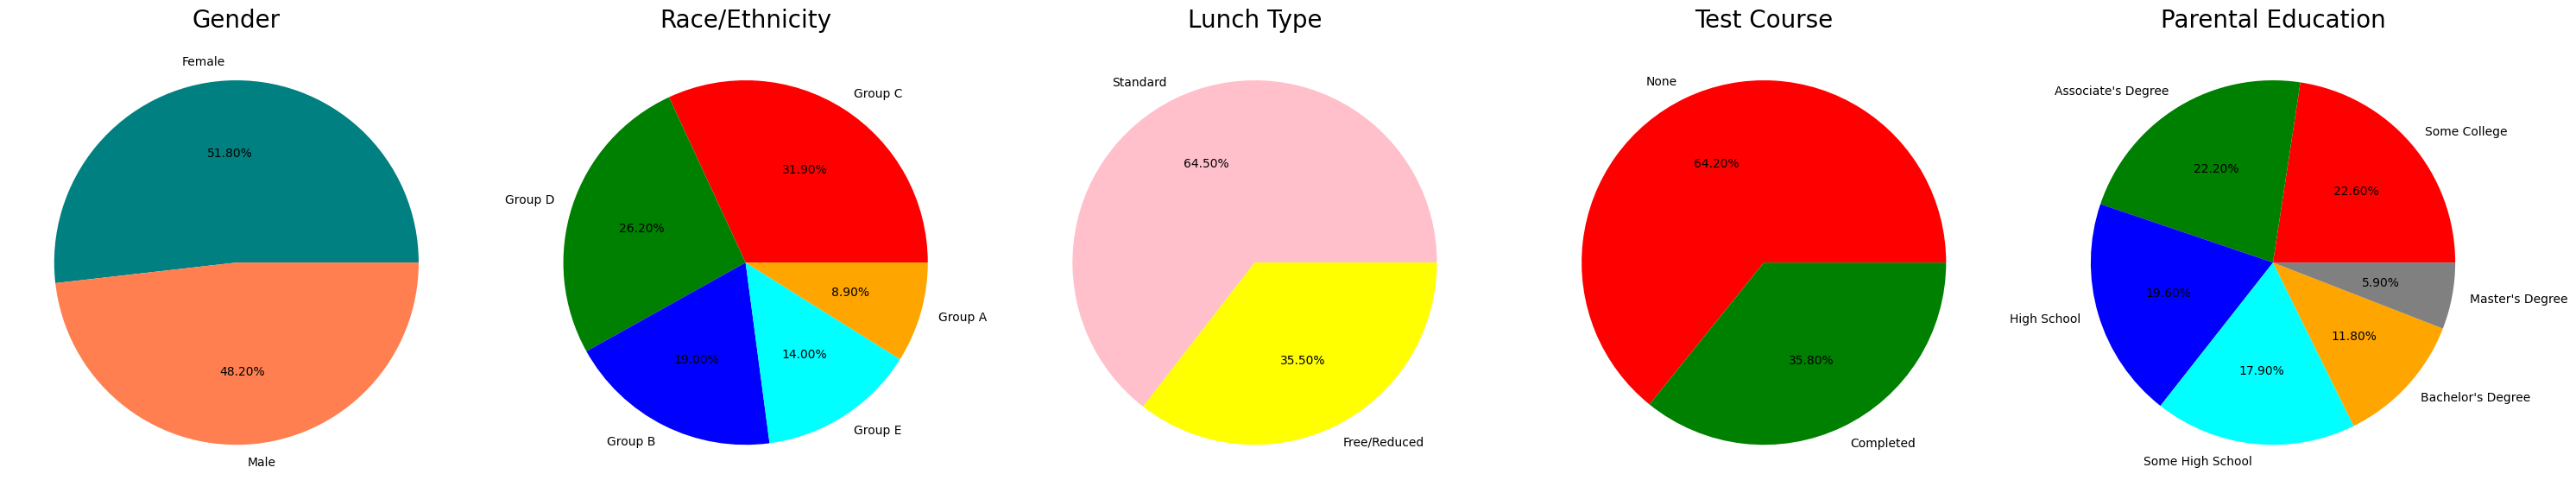

In [52]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['teal', 'coral']
plt.pie(size, colors=color, labels=labels, autopct='%2.2f%%')
plt.title("Gender", fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(size, colors=color, labels=labels, autopct='%2.2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', "Free/Reduced"
color = ['#FFC0CB', 'yellow']
plt.pie(size, colors=color, labels=labels, autopct='%2.2f%%')
plt.title('Lunch Type', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']
plt.pie(size, colors=color, labels=labels, autopct='%2.2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size, colors=color, labels=labels, autopct='%2.2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

### Insights:
- Number of Male and Female students is almost same.
- No. of students is greatest in Group C.
- Students who prefer Standard Lunch Type is greater.
- No. of students who have not enrolled in any test preparation course is greater.
- No. of students whose parental education is "Some College" is greater closely followed by "Associate's Degree".

### Feature wise Viz

### 1. Gender Column

#### 1.1 Univariate Analysis (How is distribution of Gender?)



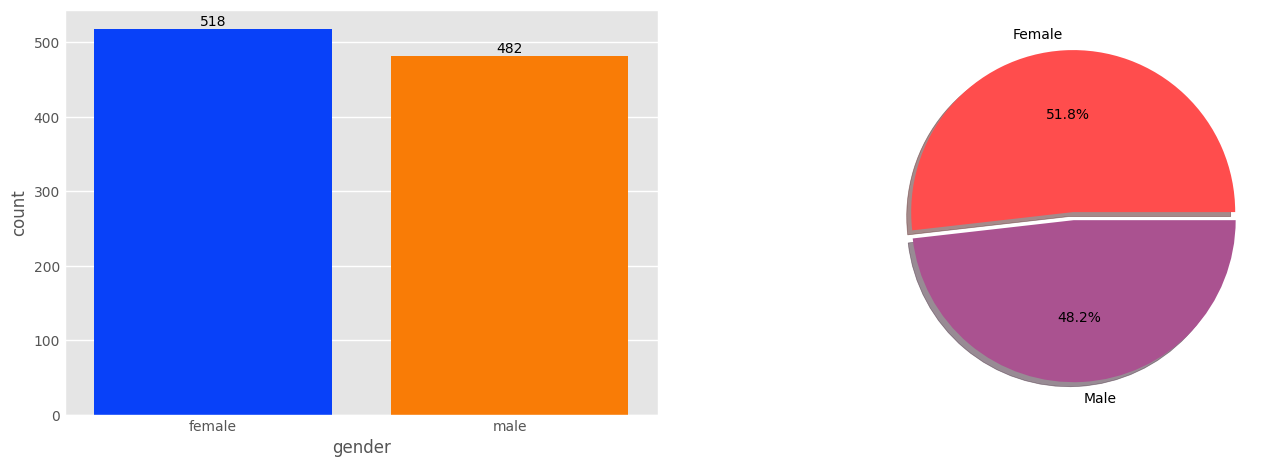

In [53]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.05],
        autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#aa5290'],)
plt.show()

#### Insights:
- Gender has balanced data

#### 1.2 BI-VARIATE ANALYSIS (does Gender have any impact on student performance)

In [54]:
gender_group= df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean() \
                .unstack().reset_index() \
                .rename(columns={'level_0':'subject', 0:"average"})
gender_group['average'] = round(gender_group['average'], 2)
gender_group

,subject,gender,average
0,math_score,female,63.63
1,math_score,male,68.73
2,reading_score,female,72.61
3,reading_score,male,65.47
4,writing_score,female,72.47
5,writing_score,male,63.31


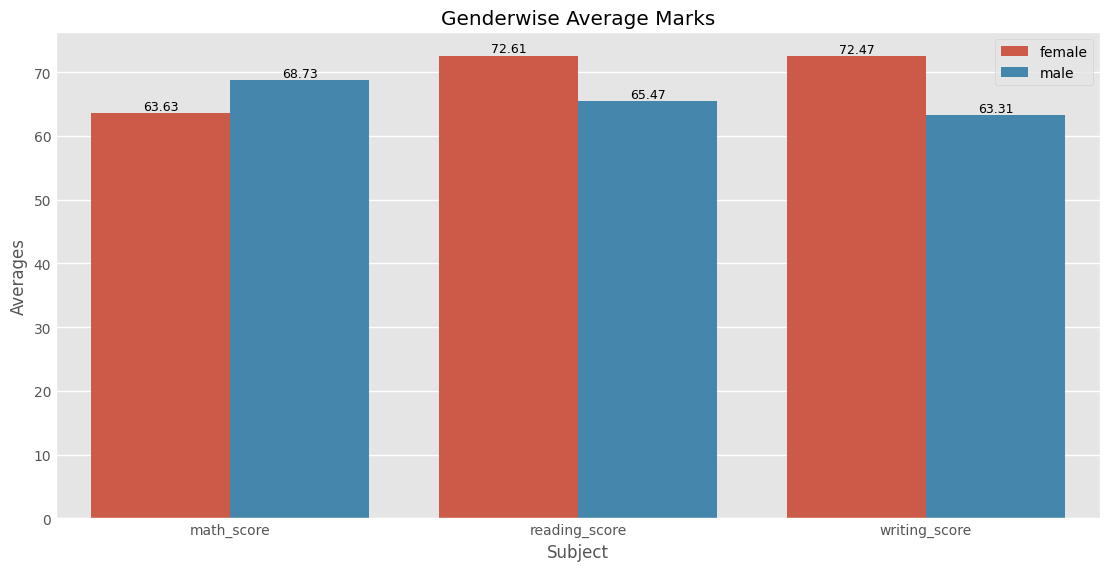

In [55]:
plt.figure(figsize=(12, 6))
fig = sns.barplot(data=gender_group, x='subject', y='average', hue='gender',)

for container in fig.containers:
    fig.bar_label(container, fontsize=9)
plt.legend(loc=1)
plt.xlabel("Subject")
plt.ylabel("Averages")
plt.title('Genderwise Average Marks')
plt.show()

#### Insights:
- On an average, females have better scores than males
- Males tend to perform better in Math

### 2. Race/Ethnicity Column

#### 2.1 UNI-VARIATE ANALYSIS (how is the group wise distribution)

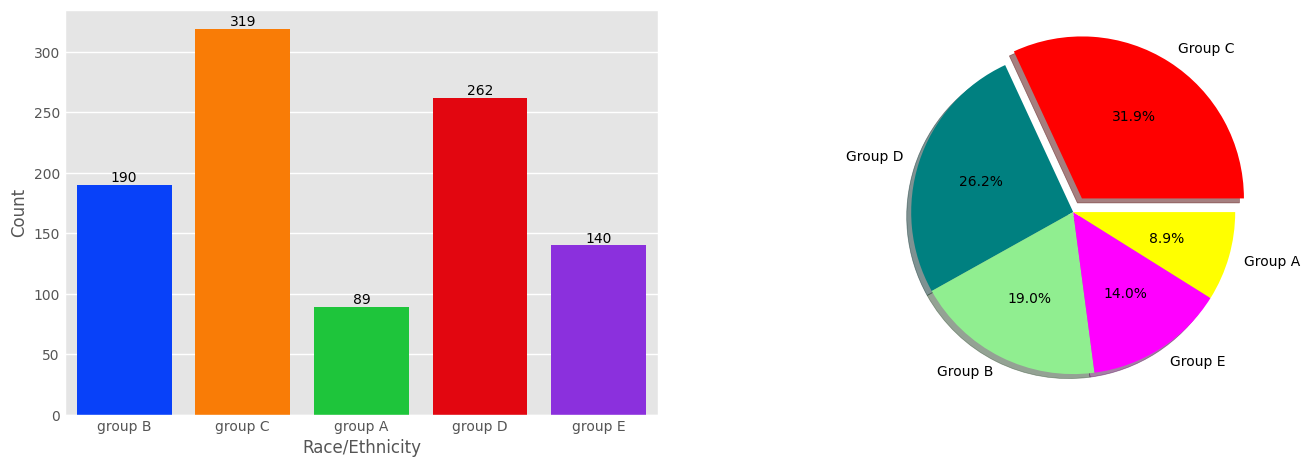

In [56]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
ax[0].set_xlabel("Race/Ethnicity")
ax[0].set_ylabel("Count")
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.pie(x=df['race_ethnicity'].value_counts(),
        labels=[g.title() for g in df['race_ethnicity'].value_counts().index],
        explode=[0.1, 0, 0, 0, 0],
        autopct='%1.1f%%',
        shadow=True,
        colors=['red', 'teal', 'lightgreen', 'magenta', 'yellow'],)
plt.show()

### Insights:
- Most of the students belong from group C and group D
- Least number of students are from Group A


#### 2.2 BIVARIATE ANALYSIS (does race/ethnicity has any impact on student's performance)

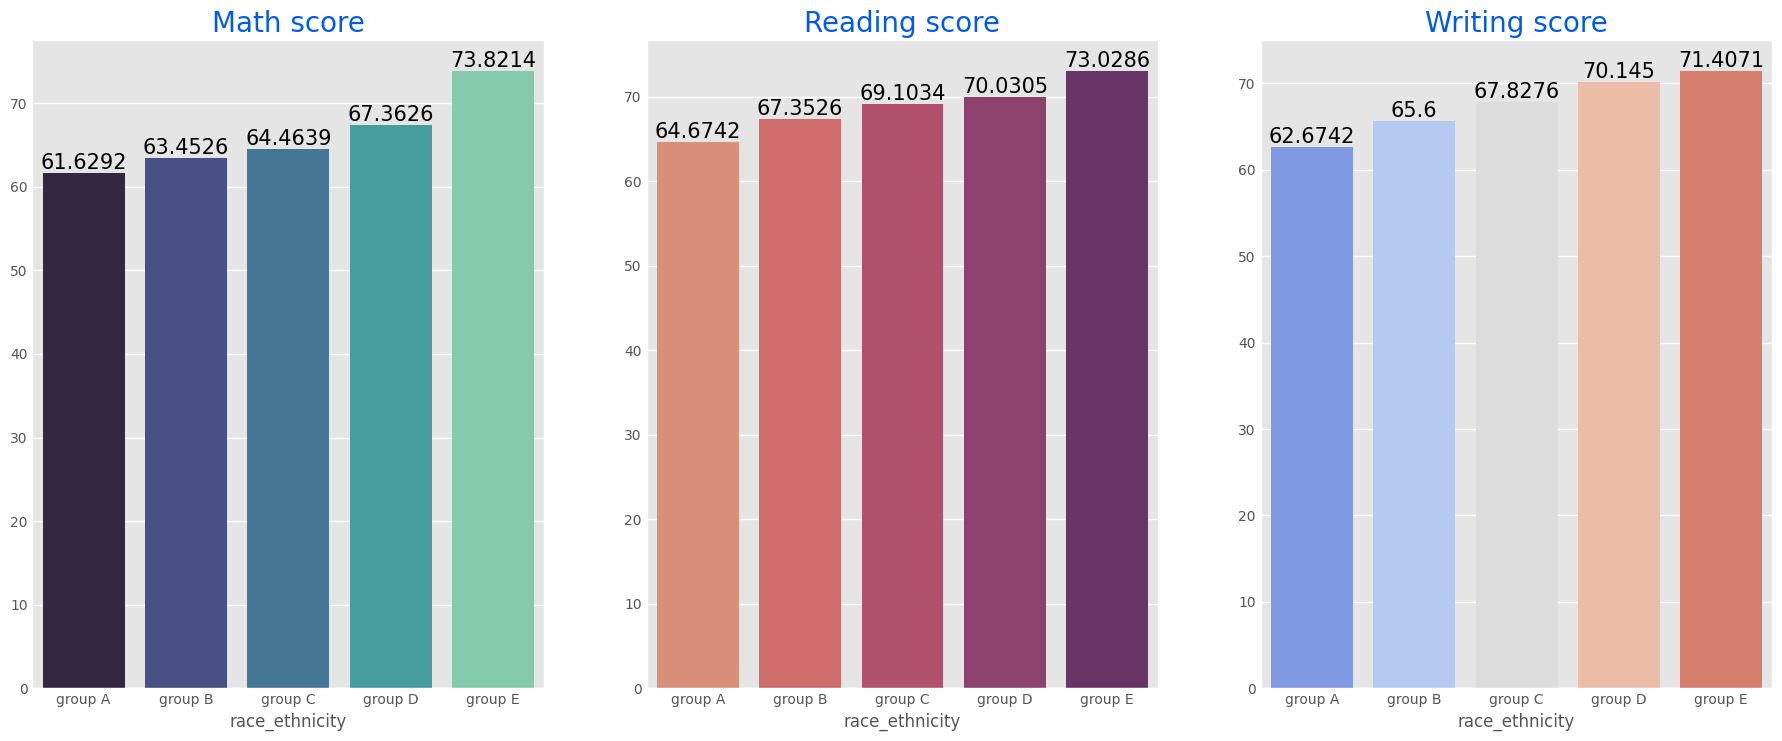

In [57]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=Group_data2['math_score'].mean().index,
            y=Group_data2['math_score'].mean().values,
            palette = 'mako',
            ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,
            y=Group_data2['reading_score'].mean().values,
            palette = 'flare',
            ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,
            y=Group_data2['writing_score'].mean().values,
            palette = 'coolwarm',
            ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights:
- Group E students scored the best in all subjects.
- Group A students have scored the lowest marks.
- Students from lower Socioeconomic status have a lower average in all course subjects.

### 3. PARENTAL LEVEL OF EDUCATION COLUMN

#### 3.1 UNIVARIATE ANALYSIS (what is the educational background of student's parents)

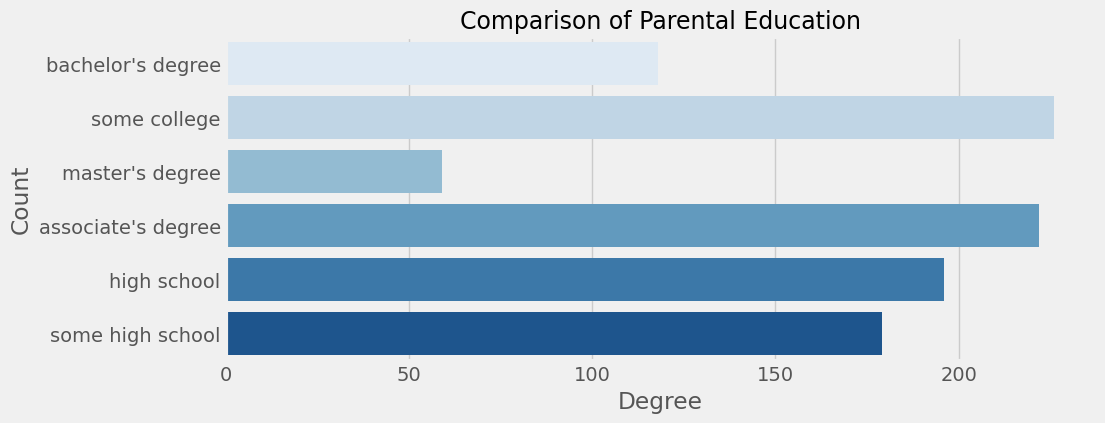

In [58]:
plt.rcParams['figure.figsize'] = (10, 4)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette='Blues')
plt.title('Comparison of Parental Education', fontweight=5, fontsize=17)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

#### Insights:
- Largest number of parents are from some college.

#### 3.2 BIVARIATE ANALYSIS (does parental education have any impact on student's performance)

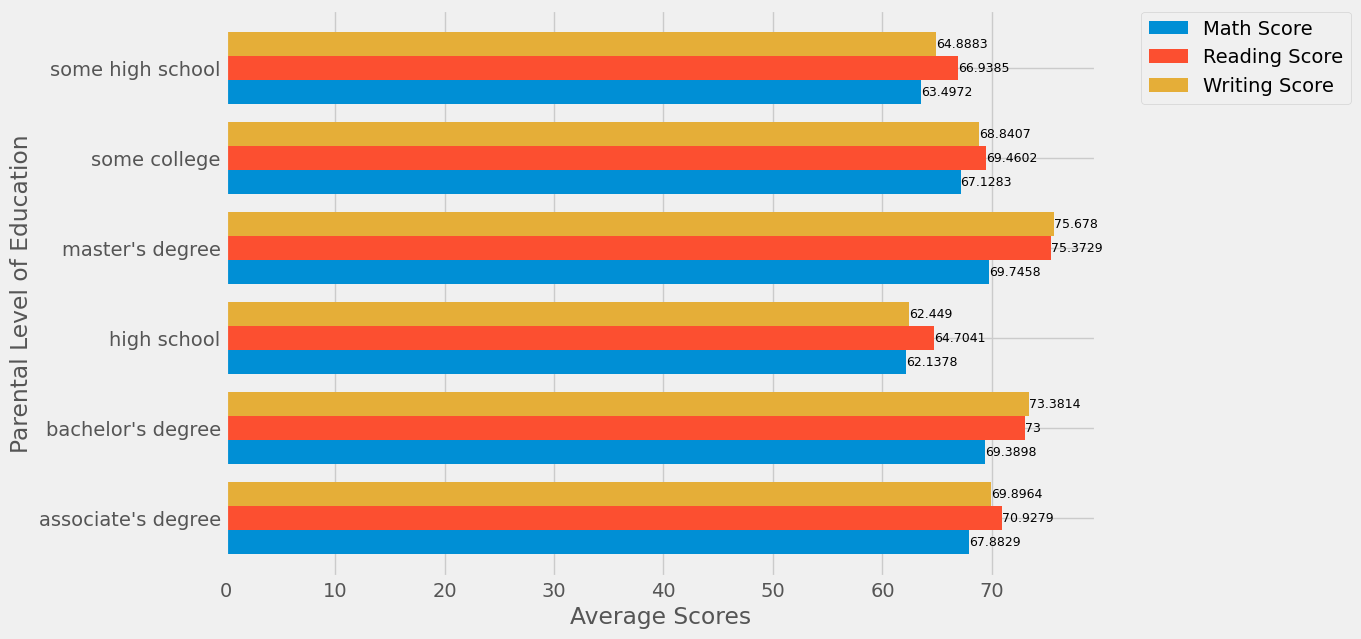

In [59]:
ax = df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']] \
            .agg('mean') \
            .plot(kind='barh',figsize=(10,7), width=0.8,)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1, labels=['Math Score', 'Reading Score', "Writing Score"])
for container in ax.containers:
    ax.bar_label(container,color='black',size=9)
plt.ylabel('Parental Level of Education')
plt.xlabel("Average Scores")
plt.show()

### Insights:
- The score of students whose parents have bachelor's or master's degree is much higher.

### 4. LUNCH COLUMN

#### 4.1 UNIVARIATE ANALYSIS (what kind of lunch do students have?)

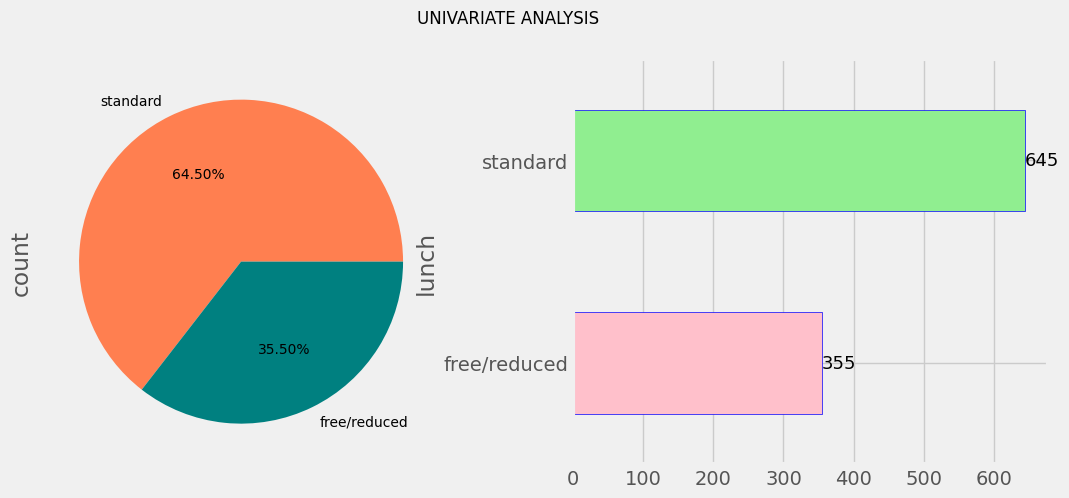

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plt.style.use('ggplot')
df['lunch'].value_counts().plot(kind='pie', autopct="%1.2f%%", ax=ax[0], colors=['coral', 'teal'])
df['lunch'].value_counts(ascending=True).plot(kind='barh', ax=ax[1], color=['pink', 'lightgreen'], edgecolor='b',)
for container in ax[1].containers:
    ax[1].bar_label(container, fontsize=13)
plt.suptitle(("Univariate Analysis").upper())
plt.show()

#### Insights:
- Most students have standard lunch

#### 4.2 BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )


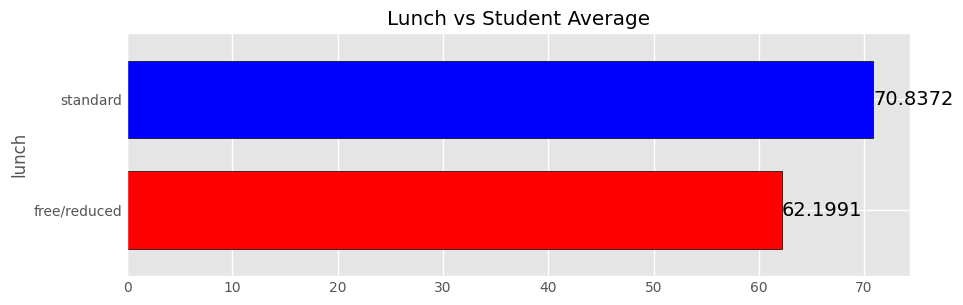

In [61]:
ax = df.groupby('lunch')['average'].mean() \
        .plot(kind='barh',
          color=['r', 'b'],
          figsize=(9, 3),
          edgecolor='black',
          width=.7)
for c in ax.containers:
    ax.bar_label(c, fontsize=14)
plt.title('Lunch vs Student Average')
plt.show()

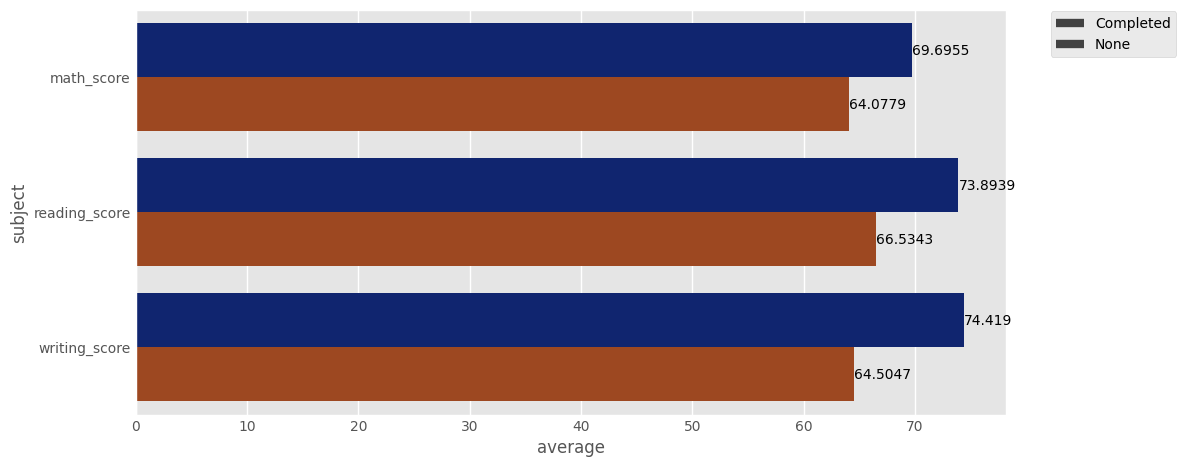

In [62]:
test_prep_avg = df.groupby('test_preparation_course')[['math_score', 'reading_score', 'writing_score']].mean() \
        .unstack().reset_index() \
        .rename(columns={"level_0":'subject', 0:"average"})
test_prep_avg

plt.figure(figsize=(10, 5))
fig = sns.barplot(data=test_prep_avg, y='subject', x='average', hue='test_preparation_course', palette="dark")
fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1, labels=['Completed', 'None'])
for c in fig.containers:
    fig.bar_label(c, fontsize=10)
plt.show()

### Checking for Outliers

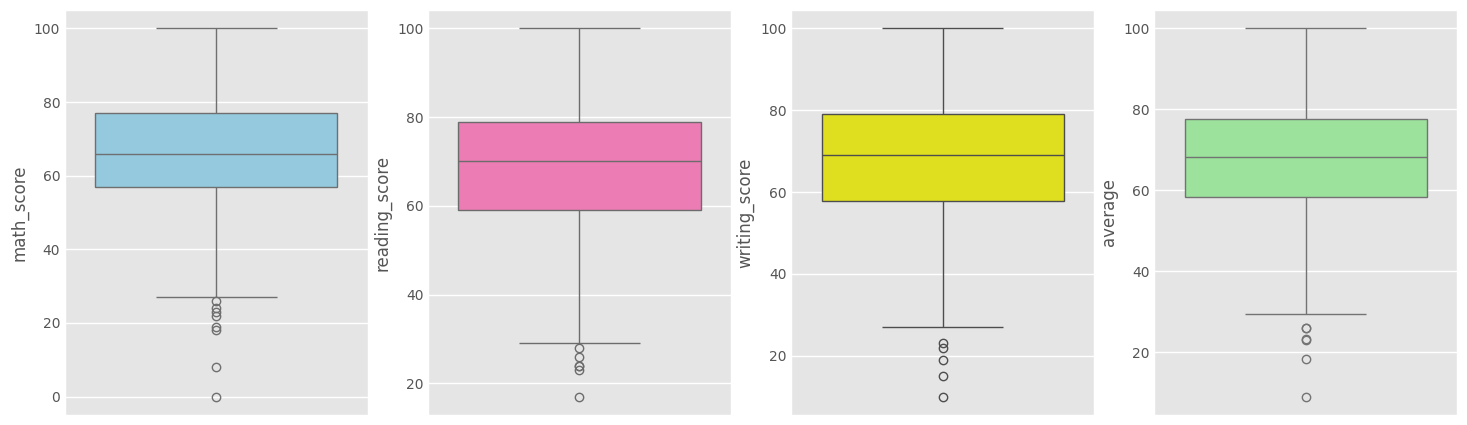

In [63]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

### MULTIVARIATE ANALYSIS USING PAIRPLOT

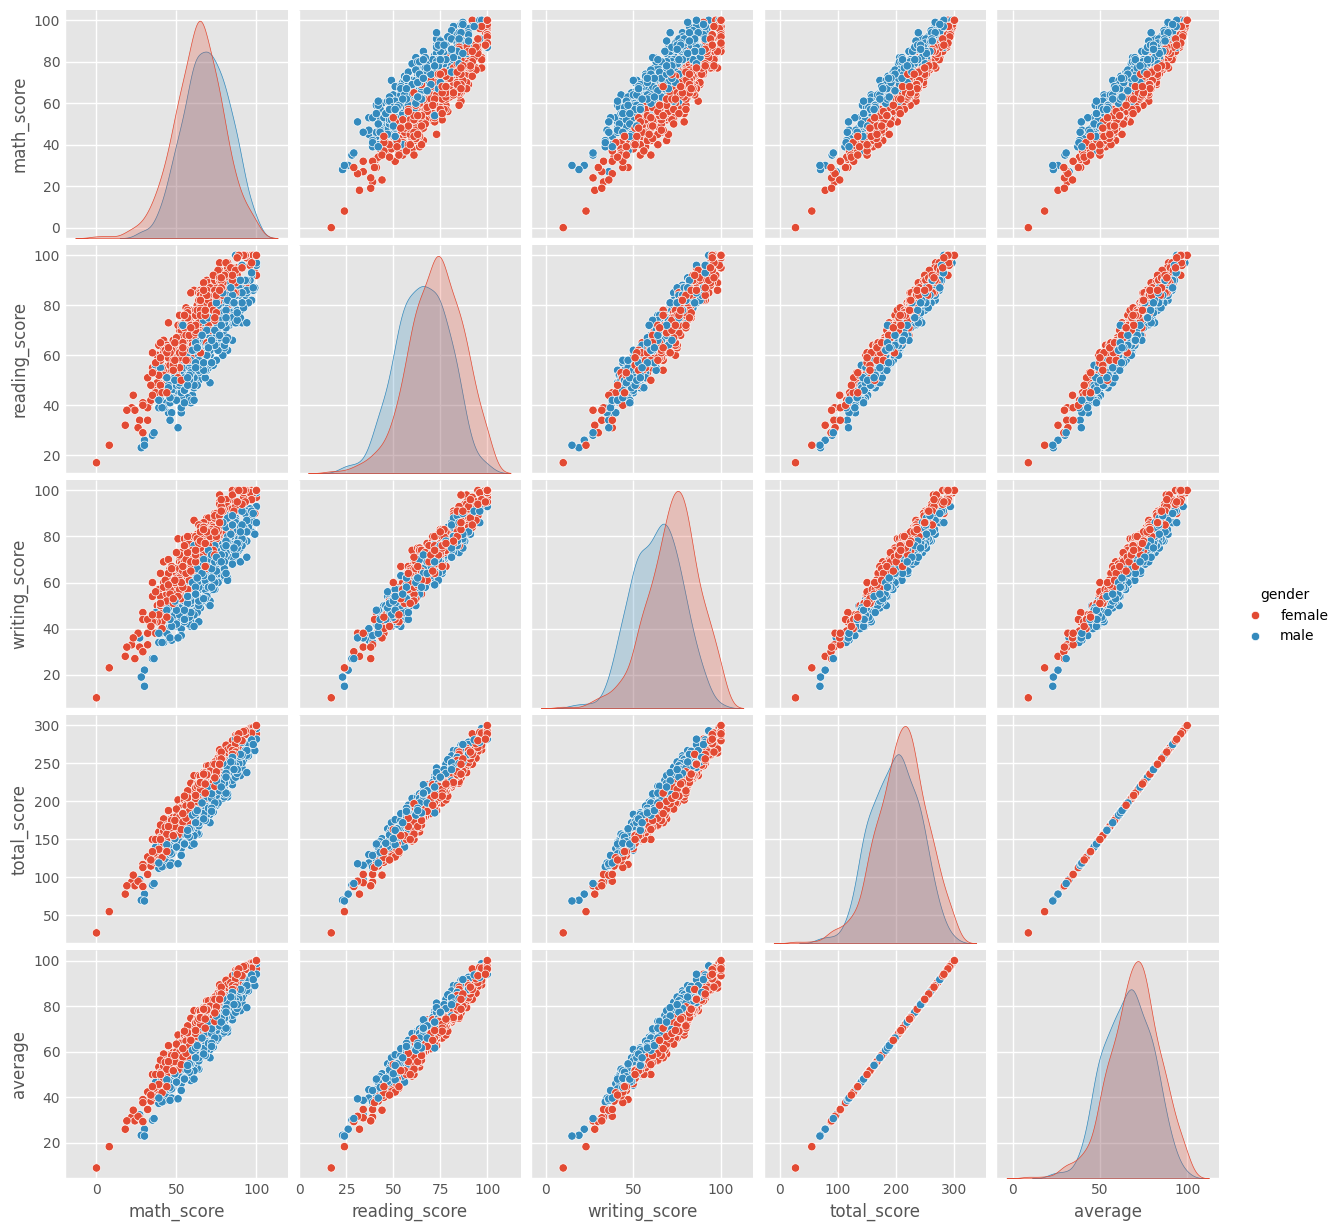

In [64]:
sns.pairplot(df, hue='gender')
plt.show()

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.